In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf


In [24]:
start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start, end)

print(df.head())

[*********************100%***********************]  1 of 1 completed

Price      Adj Close     Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                                   
2010-01-04  6.447412  7.643214  7.660714  7.585000  7.622500  493729600
2010-01-05  6.458560  7.656429  7.699643  7.616071  7.664286  601904800
2010-01-06  6.355826  7.534643  7.686786  7.526786  7.656429  552160000
2010-01-07  6.344078  7.520714  7.571429  7.466071  7.562500  477131200
2010-01-08  6.386254  7.570714  7.571429  7.466429  7.510714  447610800


In [25]:
df = df.reset_index()
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.447412,7.643214,7.660714,7.585000,7.622500,493729600
1,2010-01-05,6.458560,7.656429,7.699643,7.616071,7.664286,601904800
2,2010-01-06,6.355826,7.534643,7.686786,7.526786,7.656429,552160000
3,2010-01-07,6.344078,7.520714,7.571429,7.466071,7.562500,477131200
4,2010-01-08,6.386254,7.570714,7.571429,7.466429,7.510714,447610800


In [26]:
df = df.drop(['Date','Adj Close'], axis = 1 )
df.head()

C:\Users\soura\AppData\Local\Temp\ipykernel_19604\1039950292.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date','Adj Close'], axis = 1 )


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,7.643214,7.660714,7.585000,7.622500,493729600
1,7.656429,7.699643,7.616071,7.664286,601904800
2,7.534643,7.686786,7.526786,7.656429,552160000
3,7.520714,7.571429,7.466071,7.562500,477131200
4,7.570714,7.571429,7.466429,7.510714,447610800


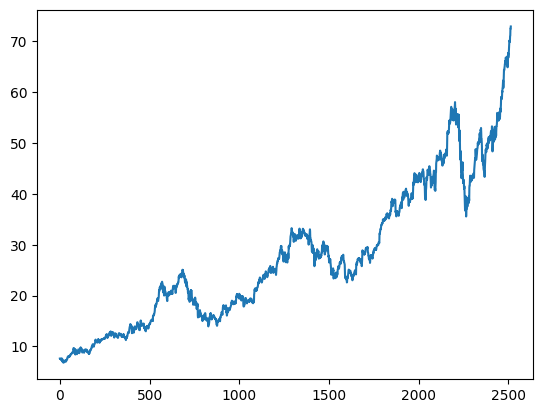

In [27]:
plt.plot(df.Close)

In [30]:
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,59.201075
2511,59.401700
2512,59.643125
2513,59.875125


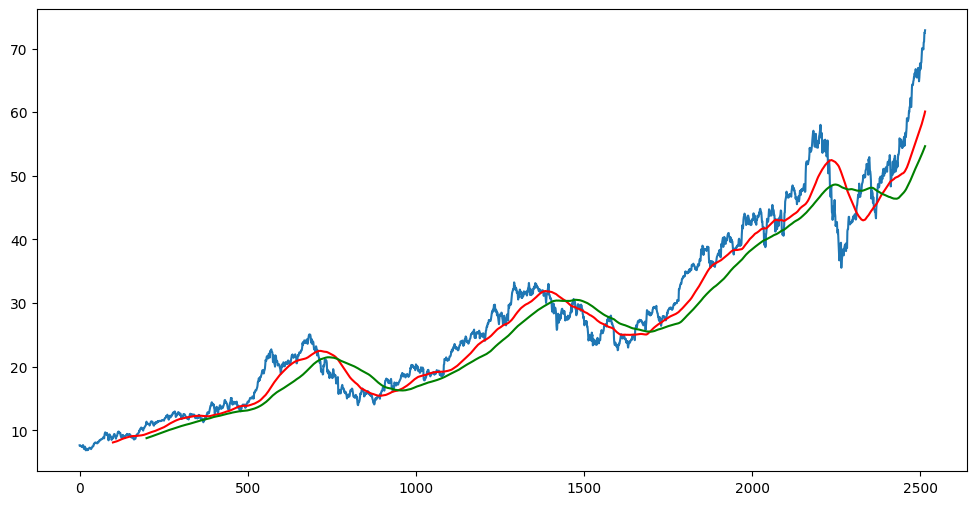

In [31]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [33]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [35]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [37]:
x_train =[]
y_train =[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train), np.array(y_train)

In [44]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [45]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences= True,
                input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units=60, activation='relu', return_sequences= True))
model.add(Dropout(0.3))



model.add(LSTM(units=80, activation='relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\soura\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - loss: 0.1424
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.0133
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.0112
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0117
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss: 0.0099
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0090
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0092
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.0074
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 0.0086
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0072
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 0.0076
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 0.0067
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 0.0081
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 0.0068
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 0.00

In [48]:
model.save('keras_model.h5')

In [49]:
past_100_days = data_training.tail(100)

In [51]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [52]:
final_df.head()

Ticker,AAPL
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [53]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [54]:
x_test =[]
y_test =[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test,y_test = np.array(x_test), np.array(y_test)

In [55]:
scaler.scale_

array([0.02123255])

In [56]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [57]:
scale_factor = 1/0.020995
y_predicted = y_predicted *scale_factor
y_test = y_test * scale_factor

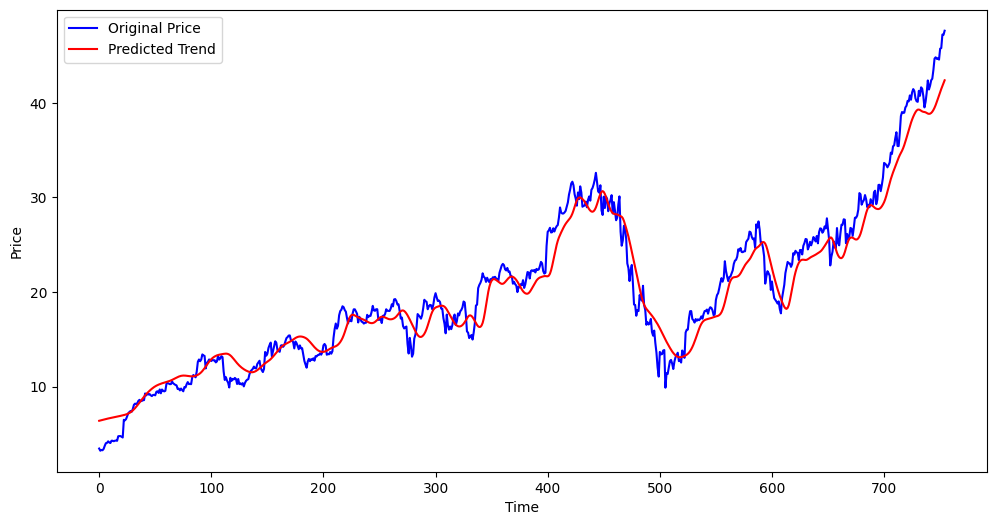

In [60]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted,'r', label = 'Predicted Trend')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()